# Graphs

In [1]:
import tensorflow as tf

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/phunc20

In [2]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

Instructions for updating:
Colocations handled automatically by placer.


True

In [3]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is tf.get_default_graph()

False

In [4]:
x2.graph is graph

True

**(?1)** Does `tf.Session` like `tf.Graph` also have `as_default()` method?<br>
**(R1)** Yes.

So nodes in diff graphs **cannot** interact with each other, or at least, not easily.

In [5]:
sess = tf.Session()
g = x1 - 2
with sess.as_default():
    sess.run(x1.initializer)
    result = g.eval()
    print(result)

-1


### Kind of like to visualize a graph inside Jupyter notebook...
- [https://blog.jakuba.net/tensorboard-visualization/](https://blog.jakuba.net/tensorboard-visualization/)

In [6]:
from graphviz import Digraph

**(!1)** I don't know why but
- `conda install graphviz` installs sth but doesn't work
- `pip install graphviz` lại xài đc

In [7]:
def tf_to_dot(graph):
    dot = Digraph()
    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)
        for i in n.input:
            dot.edge(i, n.name)

    return dot

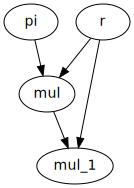

In [8]:
g = tf.Graph()
with g.as_default():
    pi = tf.constant(3.14, name="pi")
    r = tf.placeholder(tf.float32, name="r")
    y = pi * r * r

tf_to_dot(g)

### Nodes

In [9]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


Both `y` and `z` depend on `x`, which further depends on `w`. The above code of evaluating `y` and `z` will have to separately evaluate `x` and `w`, i.e. `x` and `w` are evaluated twice, which is not very economic.

- All node values are dropped btw graph runs (except variable values)
  - So, for example, the above code contains to graph runs, the first being `y.eval()`, the second `z.eval()`
- If we want economy, we should evaluate both `y` and `z` **in a single graph run**. How? As follows.

In [10]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)
    print(z_val)

10
15


**(?)** Can parentheses replace square brackets above?<br>
**(R)** Yes.

In [11]:
with tf.Session() as sess:
    y_val, z_val = sess.run((y, z))
    print(y_val)
    print(z_val)

10
15
